# ***Business Understanding***

- This is a diamond dataset where we have to predict its price in respective to carat, cut, color, clarity, depth, table, price, x, y, z dimensions variable.
- We have to predict with higher accuracy by applying suitable ML-Algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("diamonds_price_prediction.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# ***Data Understanding***

In [3]:
df.shape

(53940, 11)

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.drop("Unnamed: 0", axis =1, inplace = True)

In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.duplicated().sum()

146

In [9]:
df.drop_duplicates(inplace = True)

***carat***

- The carat variable ranges from 0.2 to 5.01.
- Carat is a measure of the weight of the diamond, where one carat is equal to 200 milligrams.

In [10]:
df["carat"].describe()

count    53794.00000
mean         0.79778
std          0.47339
min          0.20000
25%          0.40000
50%          0.70000
75%          1.04000
max          5.01000
Name: carat, dtype: float64

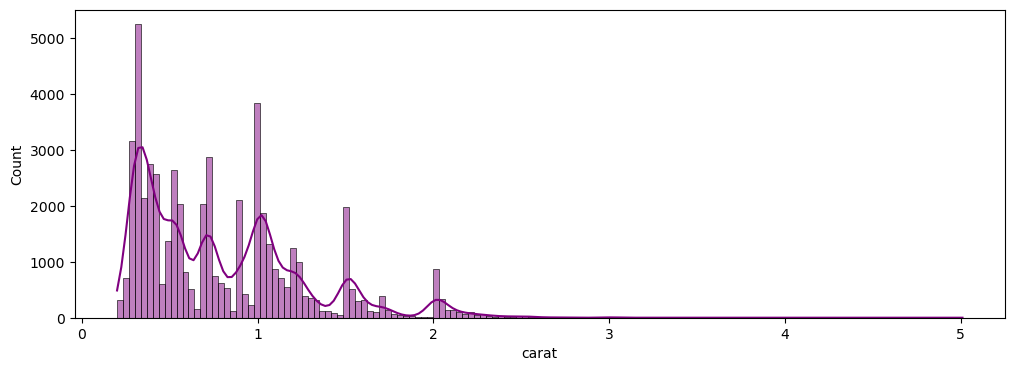

In [11]:
plt.figure(figsize = (12, 4))
sns.histplot(df["carat"], kde = True, color = "purple", )
plt.show()

***cut***

- The quality of the diamond's cut, which can affect its brilliance and overall appearance.
- Here, the datapoints are ideal, premium, good, very good and fair.

In [12]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

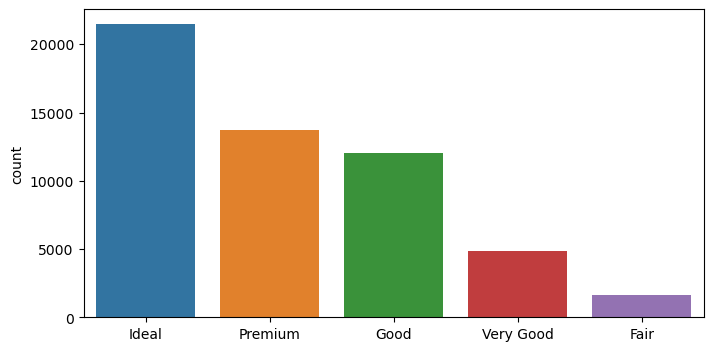

In [13]:
plt.figure(figsize = (8, 4))
sns.barplot(x = df["cut"].unique().tolist(), y = df["cut"].value_counts())
plt.show()

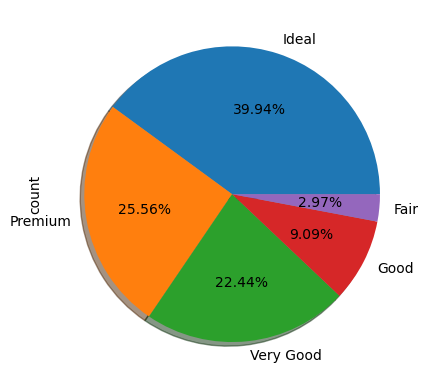

In [14]:
df["cut"].value_counts().plot(kind = "pie", autopct = "%0.02f%%", shadow = True)
plt.show()

***color***
- It refers to the color grade of the diamond.
- Here,
  - E represents Colorless
  - F represents Colorless to Near Colorless
  - I represents Near Colorless to Faint Yellow
  - J represents Faint Yellow
  - H represents Near Colorless
  - G represents Near Colorless
  - D represents Colorless

In [15]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

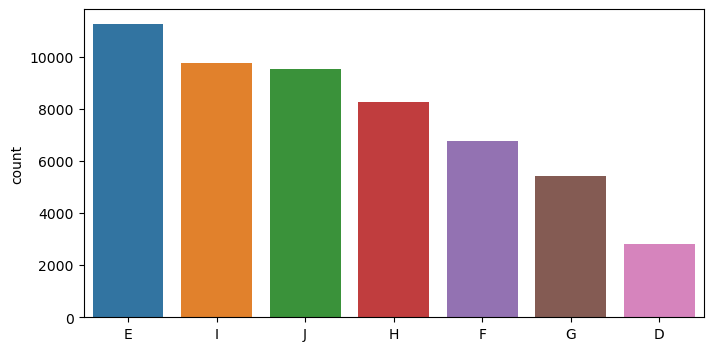

In [16]:
plt.figure(figsize = (8, 4))
sns.barplot(x = df["color"].unique().tolist(), y = df["color"].value_counts())
plt.show()

***clarity***
- Describe the presence of internal flaws or inclusions within the diamond.
- Here datapoints refer as :
  - SI2 -> Slightly included 2
  - SI1 -> Slightly included 1
  - VS1 -> Very Slightly Included 1
  - VS2 -> Very Slightly Included 2
  - VVS2 -> Very Very Slightly Included 2
  - VVS1 -> Very Very Slightly Included 1
  - I1 -> Included 1
  - I2 -> Included 2

In [17]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

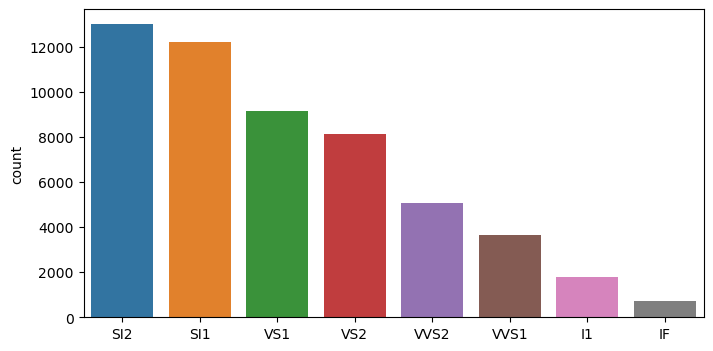

In [18]:
plt.figure(figsize = (8, 4))
sns.barplot(x = df["clarity"].unique().tolist(), y = df["clarity"].value_counts())
plt.show()

In [19]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


***Depth, Table, Price, x, y, z***
- Depth represnts heights of the diamond as a percentage of its diameter.
- Table reprsents width od diamonds top facet relative to its overall diameter.
- x represents length
- y represents width
- z represents depth 

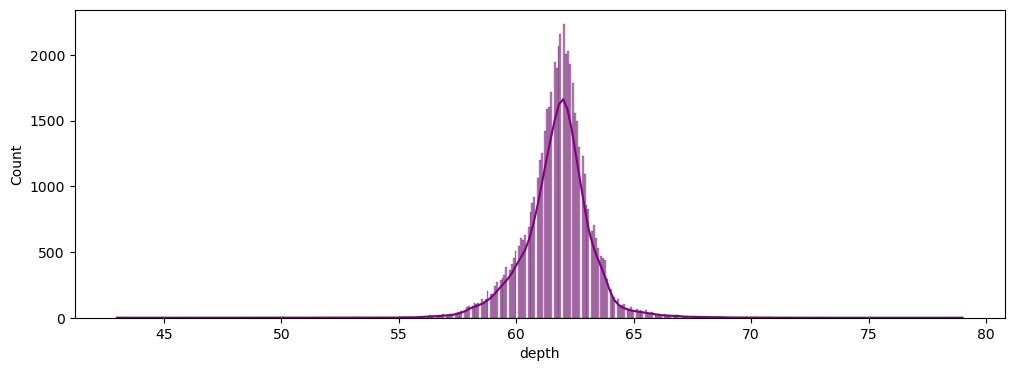

In [20]:
plt.figure(figsize = (12, 4))
sns.histplot(df["depth"], kde = True, color = "purple", )
plt.show()

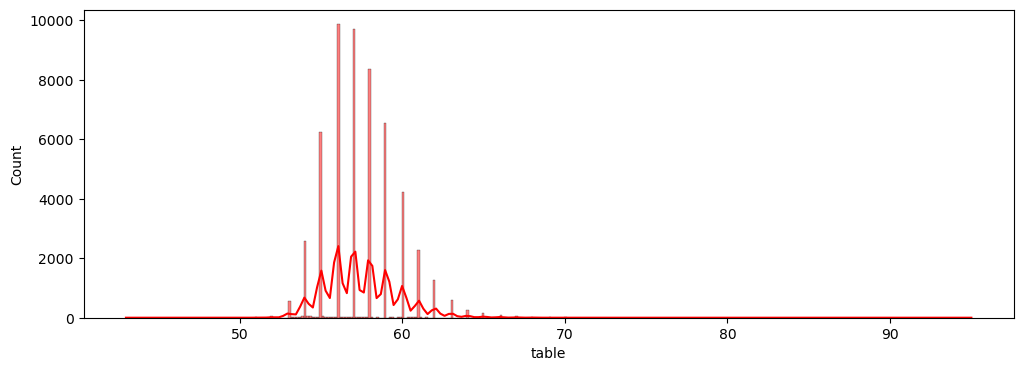

In [21]:
plt.figure(figsize = (12, 4))
sns.histplot(df["table"], kde = True, color = "red", )
plt.show()

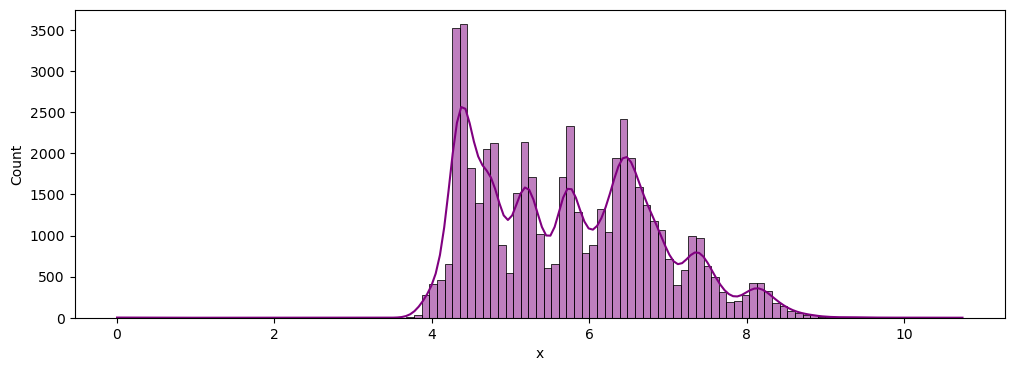

In [22]:
plt.figure(figsize = (12, 4))
sns.histplot(df["x"], kde = True, color = "purple", )
plt.show()

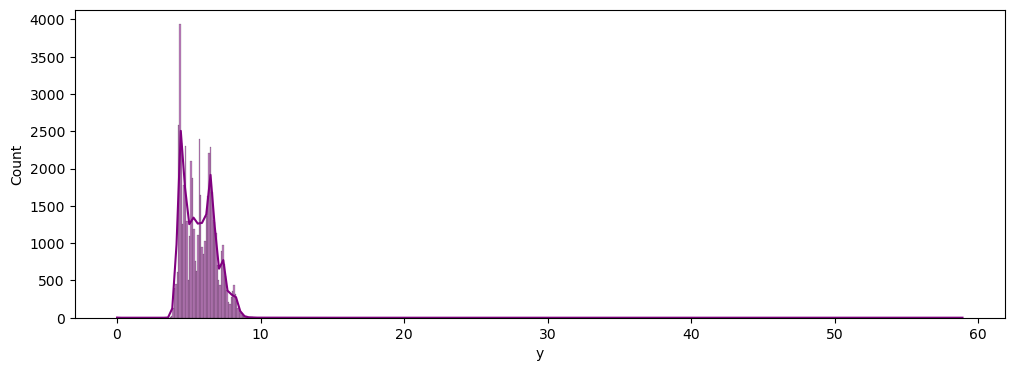

In [23]:
plt.figure(figsize = (12, 4))
sns.histplot(df["y"], kde = True, color = "purple", )
plt.show()

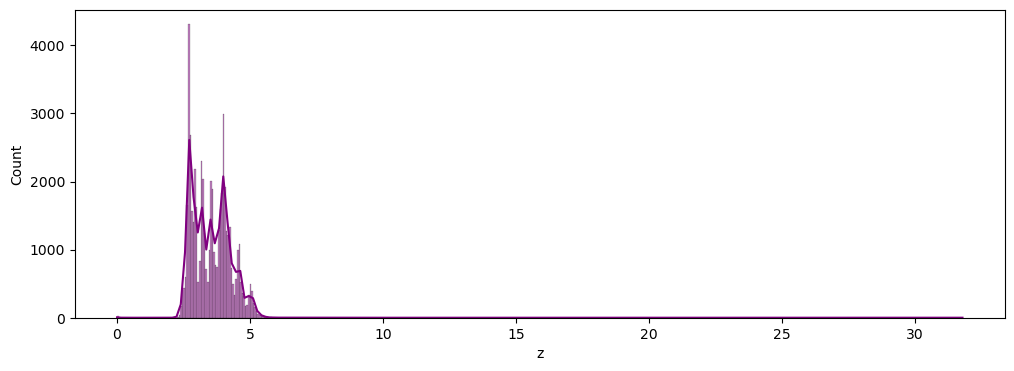

In [24]:
plt.figure(figsize = (12, 4))
sns.histplot(df["z"], kde = True, color = "purple", )
plt.show()

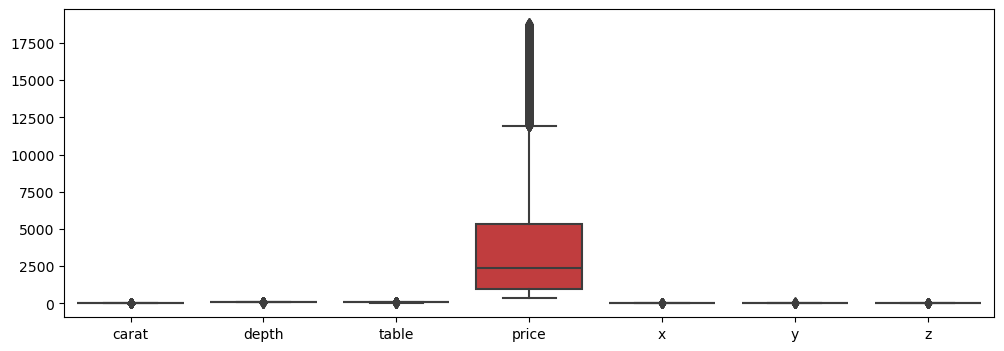

In [25]:
plt.figure(figsize = (12, 4))
sns.boxplot(df)
plt.show()

In [26]:
corr = df.drop(["color", "cut", "clarity"], axis = 1).corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


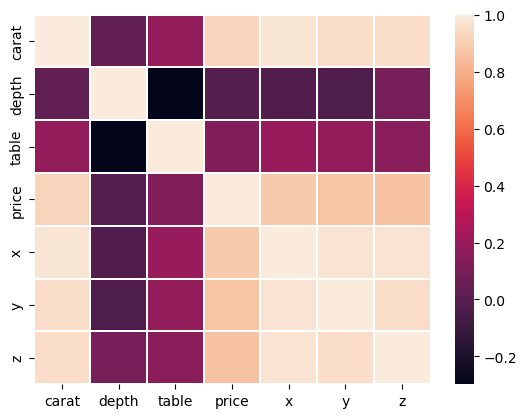

In [27]:
sns.heatmap(corr, linewidth = 0.1)
plt.show()

# ***Data Preprocessing***

***Data Cleaning***
- There isn't any missing or duplicated value.
- There isn't any genuine outliers present in independent variable.

***EDA***
- Seeing the relationship between independent variable and dependent variable.

In [28]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


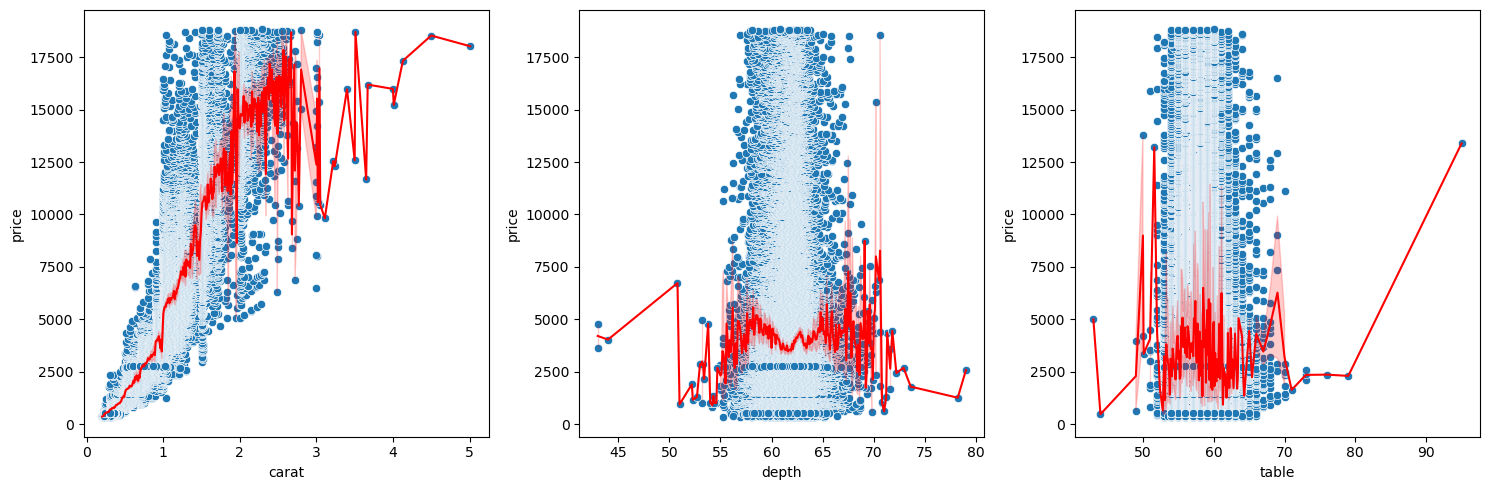

In [51]:
# Visualizing the continuous variable in respective to price variable

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(x = df["carat"], y = df["price"], ax = axes[0])
sns.lineplot(x = df["carat"], y = df["price"], color = "red", ax = axes[0])

sns.scatterplot(x = df["depth"], y = df["price"], ax = axes[1])
sns.lineplot(x = df["depth"], y = df["price"], color = "red", ax = axes[1])

sns.scatterplot(x = df["table"], y = df["price"], ax = axes[2])
sns.lineplot(x = df["table"], y = df["price"], color = "red", ax = axes[2])

plt.tight_layout()
plt.show()

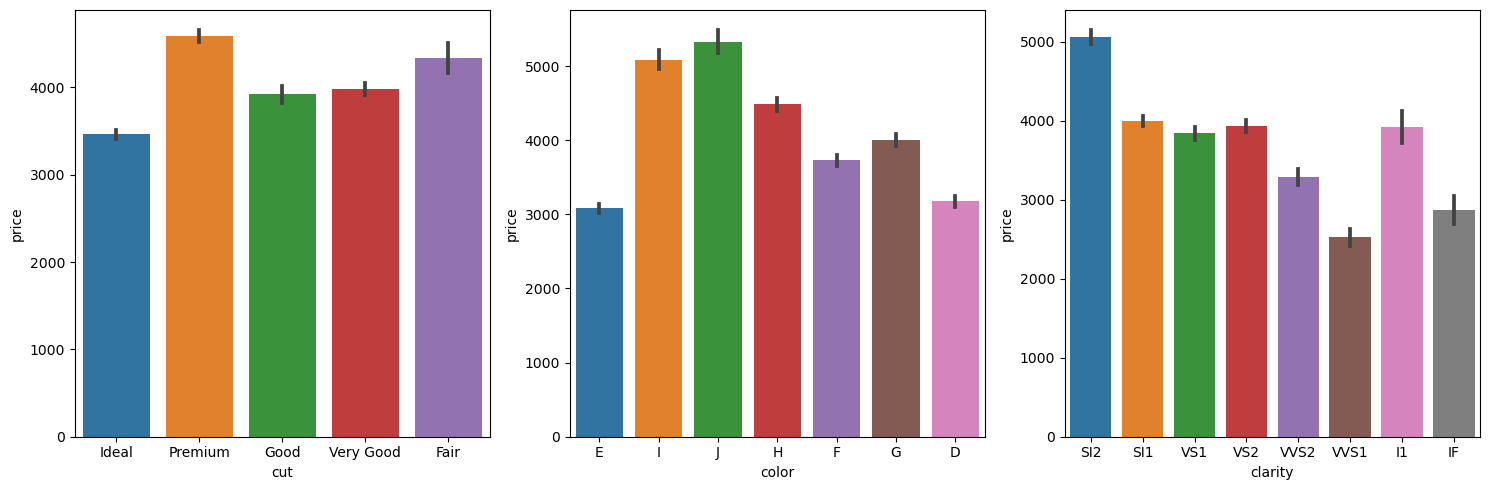

In [52]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.barplot(x = df["cut"], y = df["price"], ax = axes[0])
sns.barplot(x = df["color"], y = df["price"], ax = axes[1])
sns.barplot(x = df["clarity"], y = df["price"], ax = axes[2])

plt.tight_layout()
plt.show()

***Fetaure Transformation***

In [53]:
df.drop(["color", "cut", "clarity"], axis = 1).skew()

carat    1.113651
depth   -0.114250
table    0.792227
price    1.618240
x        0.379624
y        2.445768
z        1.529023
dtype: float64

In [54]:
df["carat"] = np.log(df["carat"])
df["y"] = np.log(df["y"] + 1)
df["z"] = np.log(df["z"] + 1)
df["price"] = np.log(df["price"])

In [55]:
df.drop(["color", "cut", "clarity"], axis = 1).skew()

carat    0.094396
depth   -0.114250
table    0.792227
price    0.114315
x        0.379624
y        0.032209
z       -0.132022
dtype: float64

# ***Main Problem***
- The main problem is dealing with multicollinearity.
- The dimension x, y, z is highly correlated with target variable.
- Considering the volume of x,y,z also can't solve the problem.
- Therefore, we move towards dimensionality reduction or regularization.

In [56]:
df.to_csv("diamond.csv", index = False)